In [1]:
import numpy as np
import scipy as sc

A=np.array([[2,4,6],[5,3,2],[7,8,9]]) #Define the coefficient matrix A
print(A)

b=np.array([18,13,30]) #Define the right hand side vector b
print(b)

D=sc.linalg.solve(A,b) #use the solve function to find the solution vector directly
print(D)


[[2 4 6]
 [5 3 2]
 [7 8 9]]
[18 13 30]
[ 4.5 -7.5  6.5]


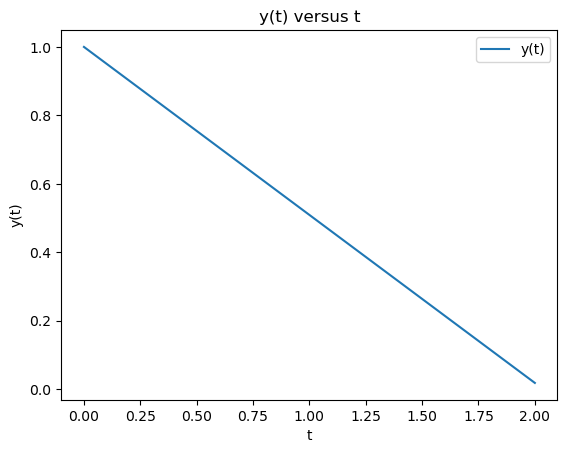

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE function
def model(y, t):
    dydt = -2 * y * t
    return dydt

# Set the initial condition
y0 = 1.0

# Create a time array from 0 to 2 with small time steps
t = np.linspace(0, 2, 2)

# Solve the ODE using odeint
y = odeint(model, y0, t)

# Plot the solution
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('y(t) versus t')
plt.legend()
plt.show()

In [ ]:
import requests
import matplotlib.pyplot as plt

def get_weather_forecast(latitude, longitude, timezone, forecast_days, elevation):
    api_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "timezone": timezone,
        "forecast_days": forecast_days,
        "elevation": elevation
        
    }

    response = requests.get(api_url, params=params)

    # Check for errors in the response
    response.raise_for_status()

    data = response.json()
    return data

def plot_temperature_trend(data, latitude, longitude, forecast_days):
    hourly_data = data['hourly']['temperature_2m']

    hours = [entry['timestamp'] for entry in hourly_data]
    temperatures = [entry['value'] for entry in hourly_data]
#Plot graph
    plt.plot(hours, temperatures, marker='o')
    plt.xlabel('Hour')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Hourly Temperature Trend\nLatitude: {latitude}, Longitude: {longitude}, Forecast Days: {forecast_days}, Elevation: {elevation}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
#Prompt user to insert input
def main():
    while True:
        try:
            latitude = input("Enter latitude: ")
            longitude = input("Enter longitude: ")
            timezone = input("Enter timezone (e.g., Asia/Singapore): ")
            forecast_days = int(input("Enter number of forecast days (1-16): "))
            elevation = input("Enter the elevation: ")

            if not (1 <= forecast_days <= 16):
                print("Please enter a valid number of forecast days (1-16).")
                continue

            data = get_weather_forecast(latitude, longitude, timezone, forecast_days,elevation)
            plot_temperature_trend(data, latitude, longitude, forecast_days,elevation)

        except requests.exceptions.RequestException as e: #Error Handling
            print(f"Error making the API request: {e}")
        except ValueError:
            print("Invalid input. Please enter a valid number.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

        reforecast = input("Do you want to reforecast with a different number of days? (yes/no): ").lower()
        if reforecast != 'yes': #Give options for user to reforecast or exit the program
            break

if __name__ == "__main__":
    main()

Enter latitude: 2.375
Enter longitude: 112.5
Enter timezone (e.g., Asia/Singapore): Asia
Enter number of forecast days (1-16): 5
Enter the elevation: 272
Error making the API request: 400 Client Error: Bad Request for url: https://api.open-meteo.com/v1/forecast?latitude=2.375&longitude=112.5&timezone=Asia&forecast_days=5&elevation=272
